In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import networkx as nx

from statsmodels.tsa.vector_ar.var_model import VAR

import warnings
warnings.filterwarnings('ignore')

# VAR - Vector Autoregression

$$
\mathbf{y}_t=\sum_{p=1}^P\mathbf{B}_p\mathbf{y}_{t-p}+\mathbf{e}_t
$$

$$
\mathbf{Y}=\mathbf{X}\mathbf{B}+\mathbf{E}
$$

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Datetime'>

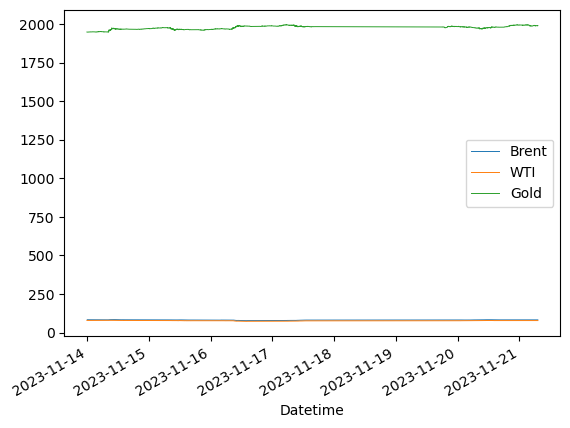

In [8]:
# get some comodity data

tickers = ['BZ=F', 'CL=F', 'GC=F']

# Download data
df = yf.download(tickers, period='7d', interval='1m')['Adj Close']

# rename columns
df.columns = ['Brent', 'WTI', 'Gold']

# forward fill nan values
df = df.ffill()

# Create log returns
rt = np.log(df).diff().dropna()

df.plot(linewidth=0.7)


In [11]:
order = 10

# Fit VAR model
model = VAR(rt)
results = model.fit(order)
display(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Nov, 2023
Time:                     13:20:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -48.2832
Nobs:                     7277.00    HQIC:                  -48.3409
Log likelihood:           145115.    FPE:                9.83191e-22
AIC:                     -48.3712    Det(Omega_mle):     9.70732e-22
--------------------------------------------------------------------
Results for equation Brent
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000001         0.000006           -0.257           0.797
L1.Brent         -0.139335         0.018132           -7.685           0.000
L1.WTI            0.154273         0.017258            8.939           0.000

## Impulse Response Analysis

Impulse Response Analysis is used to understand how a variable in a multivariate system responds over time to shocks (or impulses) in each variable, including itself.

$$
\mathbf{Y}_t=\mu+\sum_{i=0}^\infty\mathbf{\Phi}_iu_{t-i}
$$

Note the plot function is flexible and can plot only variables of interest if so desired:

```python
irf.plot(impulse='BZ=F')
```

Text(0.5, 348.4068627450981, 'Minutes')

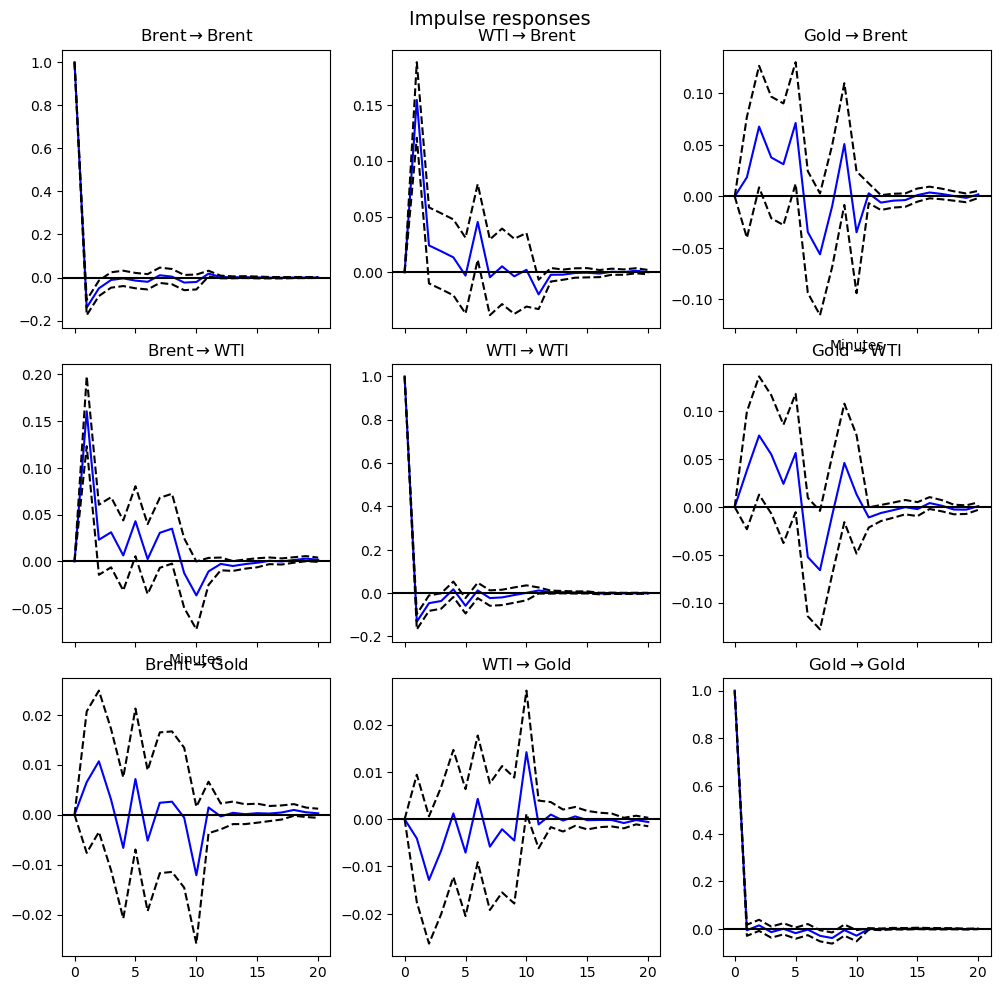

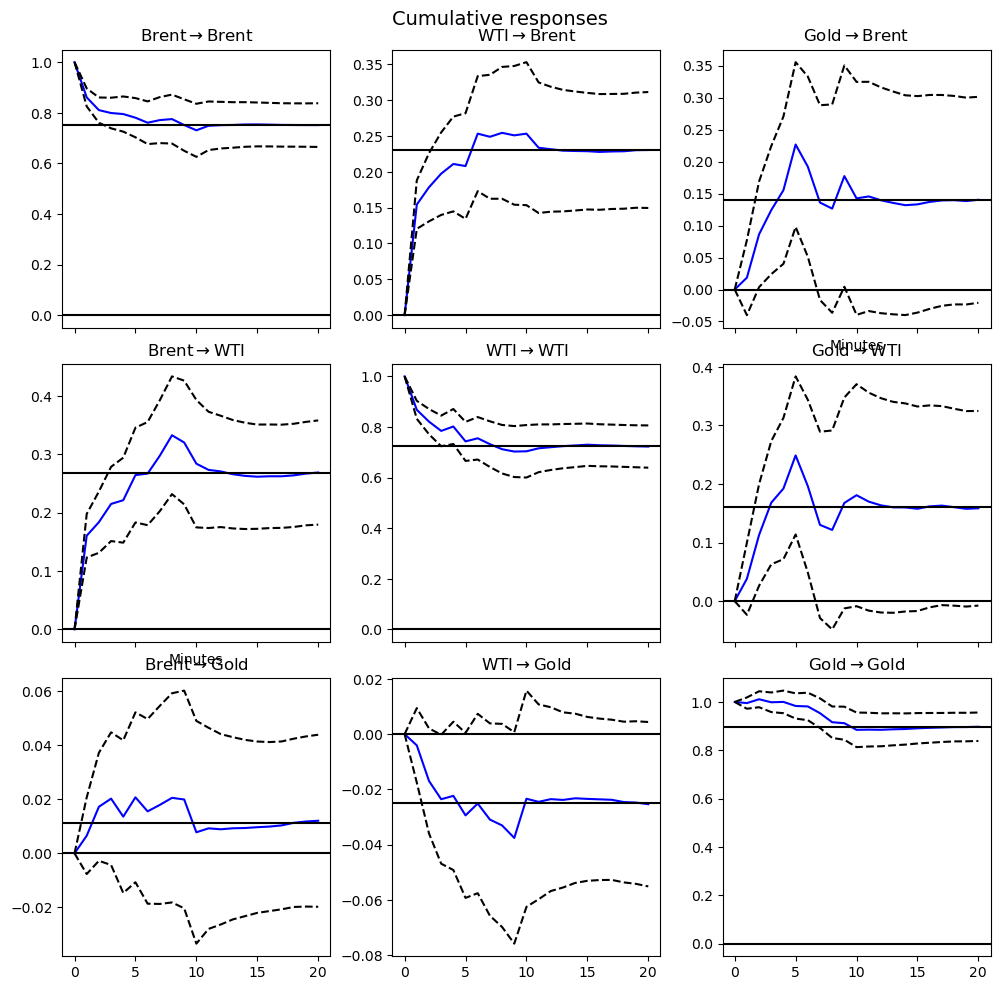

In [12]:
irf = results.irf(20)
fig_1 = irf.plot(orth=False)
fig_2 =irf.plot_cum_effects(orth=False);

fig_1.tight_layout(pad=0.7)
fig_2.tight_layout(pad=0.7)

# set minutes as xlabel
fig_1.axes[2].set_xlabel('Minutes')
fig_2.axes[2].set_xlabel('Minutes')
fig_1.axes[3].set_xlabel('Minutes')
fig_2.axes[3].set_xlabel('Minutes')

## Forecast Error Variance Decomposition (FEVD)


Forecast Error Variance Decomposition (FEVD) provides an understanding of how much of the forecast error variance of each variable in the multivariate system can be attributed to shocks (or innovations) to each variable in the system. In simpler terms, it helps to decipher the extent to which future values of a variable can be explained by its own shocks versus shocks to other variables in the model.

$$
\omega_{jk,i}(H)=\frac{\sum_{h=0}^{H-1}(e_j'\Theta_ie_h)^2}{\sum_{h=0}^{H-1}e_j'\Phi_i\Sigma_u\Phi_i'e_h}
$$


**Interpretation:**

If a large proportion of the forecast error variance of a variable is attributed to its own shocks, the variable is said to have a strong internal dynamics.
Conversely, if a significant portion of the variance is due to shocks to other variables, it suggests that external factors (represented by these other variables) play a major role in influencing the variable.

**Usage:**

FEVD is particularly useful in policy analysis, economic forecasting, and financial market studies. It helps in understanding the dynamics of economic systems and the interdependencies among different economic variables.

FEVD for Brent
         Brent       WTI      Gold
0     1.000000  0.000000  0.000000
1     0.989790  0.010172  0.000038
2     0.988845  0.010400  0.000755
3     0.988537  0.010491  0.000972
4     0.988381  0.010517  0.001102
5     0.987529  0.010596  0.001876
6     0.987472  0.010652  0.001876
7     0.987471  0.010652  0.001877
8     0.987470  0.010652  0.001877
9     0.987470  0.010652  0.001877
10    0.987470  0.010652  0.001878
11    0.987469  0.010652  0.001878
12    0.987469  0.010652  0.001878
13    0.987469  0.010652  0.001878
14    0.987469  0.010652  0.001878

FEVD for WTI
         Brent       WTI      Gold
0     0.575956  0.424044  0.000000
1     0.573291  0.426496  0.000213
2     0.572489  0.426513  0.000998
3     0.571981  0.426559  0.001459
4     0.571976  0.426480  0.001544
5     0.571079  0.426912  0.002009
6     0.571005  0.426987  0.002009
7     0.571004  0.426987  0.002009
8     0.571003  0.426987  0.002010
9     0.571001  0.426989  0.002010
10    0.571000  0.426990  

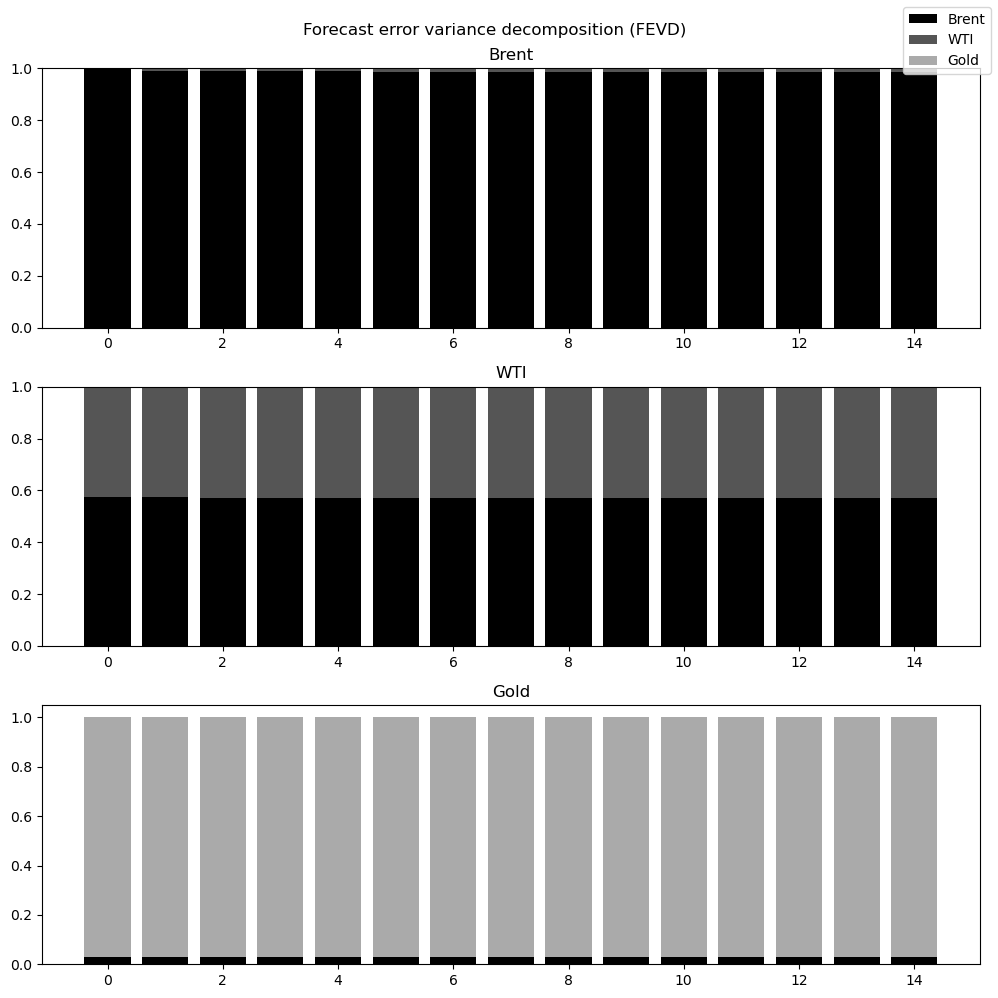

In [6]:
fevd = results.fevd(15)
fevd.summary()
fig = fevd.plot()
fig.tight_layout()


# Total spillovers

The total
spillover index measures the contribution of spillovers
of volatility shocks across four asset classes to the total
forecast error variance.


$$
S^g(H)=100\cdot\frac{1}{N}\sum_{i,j=1}^N\omega_{ij,g}(H)
$$